In [1]:
from drowsiness_detection.data import load_experiment_objects
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.interpolate import griddata
import numpy as np

In [69]:
config, best_model, search_results = load_experiment_objects(experiment_id=16, log_dir="../../logs_to_keep/")

max_depths = search_results.cv_results_["param_classifier__max_depth"]
min_samples = search_results.cv_results_["param_classifier__min_samples_split"]
scores = search_results.cv_results_["mean_test_score"]

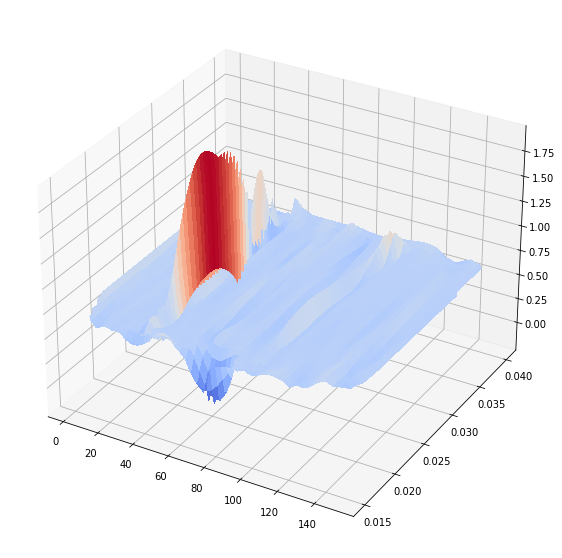

In [70]:
plt.rcParams["figure.figsize"] = 10,10
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

min_depth, max_depth = 2, 150
min_min_samples, max_min_samples = 0.015, 0.04
x1 = np.linspace(min_depth, max_depth, 100)
y1 = np.linspace(min_min_samples, max_min_samples, 100)
# Make data.
x2, y2 = np.meshgrid(x1, y1)
z2 = griddata(points=(max_depths, min_samples), values=scores, xi=(x2,y2), method="cubic")

surf = ax.plot_surface(x2, y2, z2, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

python drowsiness_detection/run_grid_search_experiment.py with dense_nn recording_frequency=60 window_in_sec=10 num_targets=2 seed=45;
